In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Method for Sourcing Data ##
* Collected first five playlists for each of the following category IDs: 'workout', 'focus', 'dinner' and 'sleep' (there were no category IDs that were explicit to time of day, so I've made the assumption that users would want upbeat music in the morning, and focus/concentration music during the day).
* For each playlist, I traversed through their tracklists and made API calls to collect audio features

## Field Description ##
* **name:** Name of song
* **artist:** Artist of song
* **id:** Track ID
* **popularity:** Popularity of the track from 0-100

Audio Features
(for more info: https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

* **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **danceability:** how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **duration_ms:** duration of track in milliseconds
* **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo:** The overall estimated tempo of a track in beats per minute (BPM). 
* **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **playlist_name:** name of playlist
* **playlist_category:** 0 = morning/workout, 1 = focus, 2 = dinner, 3 = sleep





## Clean Data pt 1 - remove duplicates##

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

In [ ]:
data.info()

Remove duplicate track IDs

In [ ]:
(data['id'].value_counts() > 1).sum()

In [ ]:
data = data.drop_duplicates(subset='id')

In [ ]:
data['id'].value_counts().sum() == len(data)

Export cleaned dataset

In [ ]:
data.to_csv('data_cleaned.csv', index=False)

## Clean Data pt2 - check relevant playlist names ##

In [ ]:
df = pd.read_csv('data_cleaned.csv')

In [ ]:
# dropped as collection of data failed and hit Spotify rate limit
df = df.drop('popularity', axis=1)

In [ ]:
df.describe()

acousticness  danceability   duration_ms        energy  \
count  25371.000000  25371.000000  2.537100e+04  25371.000000   
mean       0.250164      0.598885  2.382899e+05      0.632117   
std        0.294284      0.158429  8.243458e+04      0.221921   
min        0.000000      0.000000  3.056000e+03      0.000000   
25%        0.019800      0.498000  1.989615e+05      0.488000   
50%        0.111000      0.608000  2.270570e+05      0.666000   
75%        0.404000      0.713000  2.636800e+05      0.810000   
max        0.996000      0.983000  4.556388e+06      1.000000   

       instrumentalness      liveness      loudness   speechiness  \
count      25371.000000  25371.000000  25371.000000  25371.000000   
mean           0.102811      0.187228     -7.674469      0.090277   
std            0.250727      0.155117      4.007086      0.095446   
min            0.000000      0.000000    -60.000000      0.000000   
25%            0.000000      0.094600     -9.200000      0.035600   
50%            0.000024      0.122000     -6.756000      0.049300   
75%            0.009050      0.234000     -5.058500      0.095700   
max            0.994000      1.000000      0.719000      0.944000   

              tempo       valence  playlist_category  
count  25371.000000  25371.000000       25371.000000  
mean     120.542503      0.470079           1.296362  
std       28.450396      0.240581           1.052329  
min        0.000000      0.000000           0.000000  
25%       98.331500      0.279000           0.000000  
50%      120.027000      0.460000           1.000000  
75%      137.983500      0.655000           2.000000  
max      220.092000      0.990000           3.000000

**Preliminary Observations**
* skewed towards less acoustic
* danceability, energy generally uniformly distributed
* low instrumentalness - to be expected as likely most songs have vocals
* large range of tempo - but some might be double time
* loudness generally as expected
* low speechiness - to be expected
* valence skewed more 'positive'

<Axes: xlabel='playlist_category', ylabel='count'>

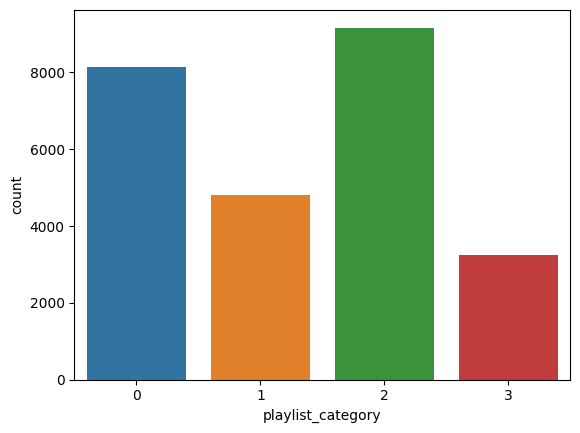

In [ ]:
sns.countplot(data = df, x = 'playlist_category')

In [ ]:
df['playlist_category'].value_counts()

2    9168
0    8151
1    4801
3    3251
Name: playlist_category, dtype: int64

In [ ]:
df[df['playlist_category'] == 0]['playlist_name'].unique()

array(["Road Trippin'", 'Workout', 'Workout2', 'roadtrippin', 'summer',
       'Summer Chill', 'motivational ', 'Summer Playlist',
       'Summer of love', 'My happy place', 'Summer', 'summer16',
       'SUMMER 2k17', 'Road Trip Mix', 'workout', 'Road', 'happy',
       'summer 2015', 'workout mix', 'Roadtrip', 'Summer Party',
       'Happy Happy Happy', 'summer 17', 'summer 2k17', 'roadtrip 🚗',
       'summer country', 'Summer 2016', 'Summer Country', 'summer 2016',
       'Summer drives', 'road trip ', 'WORKOUT', "summer 16'",
       "Summer '16", 'Inspiration', "summer '17", 'Summer 2014',
       'summer playlist', 'Summer 15', 'summer tunes', 'WORKOUT!!',
       'Summer 2017', 'summer music ', 'happy chill', 'Happy mix',
       'Summertime ', 'Summer playlist', 'road trip:)', 'Summer ',
       'road trip', 'Road Trip', 'Happy Hardcore Top 100', 'workout ',
       'Summer17', 'Summer Camp', 'summer 16', 'Summer 2013', 'Workout!',
       'HAPPY PLAYLIST', 'Summer of Love', 'inspiring'

In [ ]:
df[df['playlist_category'] == 1]['playlist_name'].unique()

array(['funky', 'Party Rock!!', 'party people', 'dance it out',
       'party music', 'Dance', 'party playlist', 'Funky', 'FUN',
       'Dance mix', 'Party time', 'Party', 'dance', 'Wedding Dance Party',
       'Party mix', 'PARTY PLAYLIST', 'party', 'Car Party',
       'Dinner Party', 'Clubbin', 'Club', 'PARTY ', 'PARTY 1',
       'Holiday Party', 'xmas party', 'Fun', 'dance yrself clean',
       'PARTY', 'Dancehall', 'Party Playlist', 'Party Mix', 'Groove',
       'Dance Dance', 'Pool Party', 'DANCE', 'Dance Club',
       'Party Country', 'Party Tunes', 'party?', 'party 2', 'fun', 'funk',
       'Christmas Party', 'PARTY PEOPLE', 'party party',
       'halloween party!', 'FUNK', 'Dance Songs', 'Fun.',
       'Engagement Party', 'Dance Class', '90s Party', 'dancehall',
       'Dance 1', 'Bachelor Party!!!', 'party ', 'Party Bus', 'Party?',
       'Fun mix', 'Birthday Party', 'Funeral', 'Party Party', 'Funk',
       'Party!', 'FUN MUSIC', 'party2', 'Fun stuff', 'dance Mix',
       'dan

In [ ]:
# drop unrelated playlist names
to_drop = ['Wedding Dance Party','Dinner Party','xmas party','Christmas Party', 'Engagement Party']
to_drop_idx = [df[df['playlist_name'] == i].index for i in to_drop]
to_drop_idx2 = [j for i in to_drop_idx for j in i]
to_drop_idx2
df = df.drop(to_drop_idx2)
df[df['playlist_category'] == 1]['playlist_name'].unique()

array(['funky', 'Party Rock!!', 'party people', 'dance it out',
       'party music', 'Dance', 'party playlist', 'Funky', 'FUN',
       'Dance mix', 'Party time', 'Party', 'dance', 'Party mix',
       'PARTY PLAYLIST', 'party', 'Car Party', 'Clubbin', 'Club',
       'PARTY ', 'PARTY 1', 'Holiday Party', 'Fun', 'dance yrself clean',
       'PARTY', 'Dancehall', 'Party Playlist', 'Party Mix', 'Groove',
       'Dance Dance', 'Pool Party', 'DANCE', 'Dance Club',
       'Party Country', 'Party Tunes', 'party?', 'party 2', 'fun', 'funk',
       'PARTY PEOPLE', 'party party', 'halloween party!', 'FUNK',
       'Dance Songs', 'Fun.', 'Dance Class', '90s Party', 'dancehall',
       'Dance 1', 'Bachelor Party!!!', 'party ', 'Party Bus', 'Party?',
       'Fun mix', 'Birthday Party', 'Funeral', 'Party Party', 'Funk',
       'Party!', 'FUN MUSIC', 'party2', 'Fun stuff', 'dance Mix',
       'dancedancedance', 'Dance Workout', 'beach party', 'THE PARTY',
       'House Party', 'Grad party', 'dance mus

In [ ]:
df[df['playlist_category'] == 2]['playlist_name'].unique()

array(['chill', 'Chill', 'Summer Chill', 'Chill Alternative',
       'chill beats', 'studying music', 'Chill music ', 'Chill Rock',
       'Studying', 'chill out', 'Chill Out', 'Chill Sesh',
       'Chill Out Music', 'Mega Chill', 'Chill Songs', 'chill  ', 'Work',
       'chillen', 'study', 'chill time', 'work music', ' CHiLl', 'work',
       'mood music', '#chill', 'Chillout ', 'Chilly', "Workin'", 'mood',
       'Mood', 'Super chill', 'Chill ', 'Chill Vibes ', 'Study',
       'chillout', 'chill jams', '/chill', "Just Chillin'",
       'Work in progress', 'study!', 'Chill music', 'Chill rap', 'Study ',
       'Chill Music', 'Work Music', 'chill edm', 'Chillin', 'Pop/Chill',
       'Working', '...chill_out...', 'Chill Rap', 'Work B**ch', 'STuDy',
       'work playlist', 'Chill Fam', 'chill bro', 'chillll',
       'Concentration', 'the chill', 'Mood Music', 'Chill/Feels',
       'Chill Times', 'mood ', 'chill trap', 'classic chill',
       'Real Chill', 'Chillax', 'Chill out', 'Chill Vi

In [ ]:
# drop 'work' playlist names
chill_names = df[df['playlist_category'] == 2]['playlist_name'].unique()
to_drop = []
for i in chill_names:
  if 'work' in i.lower():
    to_drop.append(i)
to_drop

['Work',
 'work music',
 'work',
 "Workin'",
 'Work in progress',
 'Work Music',
 'Working',
 'Work B**ch',
 'work playlist',
 'WORK IT',
 'Work it!',
 'Work jams',
 'WORK',
 'work 2']

In [ ]:
to_drop_idx = [df[df['playlist_name'] == i].index for i in to_drop]
to_drop_idx2 = [j for i in to_drop_idx for j in i]
to_drop_idx2
df = df.drop(to_drop_idx2)
df[df['playlist_category'] == 2]['playlist_name'].unique()

array(['chill', 'Chill', 'Summer Chill', 'Chill Alternative',
       'chill beats', 'studying music', 'Chill music ', 'Chill Rock',
       'Studying', 'chill out', 'Chill Out', 'Chill Sesh',
       'Chill Out Music', 'Mega Chill', 'Chill Songs', 'chill  ',
       'chillen', 'study', 'chill time', ' CHiLl', 'mood music', '#chill',
       'Chillout ', 'Chilly', 'mood', 'Mood', 'Super chill', 'Chill ',
       'Chill Vibes ', 'Study', 'chillout', 'chill jams', '/chill',
       "Just Chillin'", 'study!', 'Chill music', 'Chill rap', 'Study ',
       'Chill Music', 'chill edm', 'Chillin', 'Pop/Chill',
       '...chill_out...', 'Chill Rap', 'STuDy', 'Chill Fam', 'chill bro',
       'chillll', 'Concentration', 'the chill', 'Mood Music',
       'Chill/Feels', 'Chill Times', 'mood ', 'chill trap',
       'classic chill', 'Real Chill', 'Chillax', 'Chill out',
       'Chill Vibes', 'Chill Pills', 'chill ', "chillin'", 'Chill Mood',
       'Chillin ', 'chilllllll', 'beach chill', 'Chill Bro', 'Study

In [ ]:
df[df['playlist_category'] == 3]['playlist_name'].unique()

array(['VIBE', 'slow hands', 'Sad Songs', 'Vibe', 'sad', 'Sad songs',
       'slow', 'vibes', 'Alternative', 'Slow Stuff', 'Slow jamz',
       'Alternative Rock', 'Slow Jams', 'Breakup Songs', 'Sad',
       'Slow Dance', 'Sadness', 'Slow jams', 'Slow Jamz', 'vibe',
       'slowmotion', 'sad boi', 'sad song', 'Alternative/Rock', 'Vibes',
       'Vibez', 'Sad Music ', 'Slow Songs', 'vibe with me', 'alternative',
       'Vibe with me', 'Slow it down', 'Vibes. ', 'slow dance', 'Slow',
       'Depressing', 'SAD', 'Vibe.', 'vibezzz', 'sad days', 'sad songs',
       'Slow And Steady', 'Slow ~', 'vibezz', 'Slow songs',
       'Slow Dancing', 'Slow jam', 'slowjamz', 'slow mix', 'vibes ',
       'Moody'], dtype=object)

<Axes: xlabel='playlist_category', ylabel='count'>

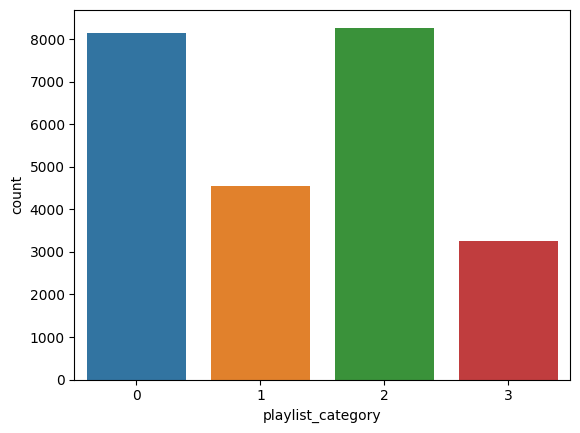

In [ ]:
sns.countplot(data = df, x = 'playlist_category')

In [ ]:
# try balancing the classes - upwards resampling
from sklearn.utils import resample
df_majority = df[(df['playlist_category'] == 0) | (df['playlist_category'] == 2)]
df_minority = df[(df['playlist_category'] == 1) | (df['playlist_category'] == 3)]

len_maj = len(df_majority)
len_min = len(df_minority)

len_maj - len_min

8630

In [ ]:
df_minority_upsampled = resample(df_minority, n_samples=(len_maj - len_min), replace=True, random_state=0)

<Axes: xlabel='playlist_category', ylabel='count'>

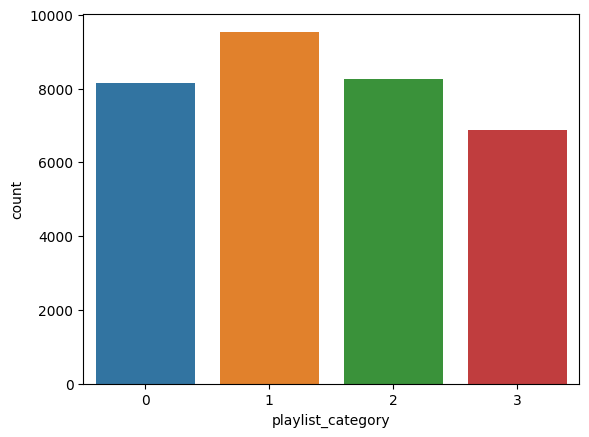

In [ ]:
df = pd.concat((df, df_minority_upsampled))
sns.countplot(data = df, x = 'playlist_category')

In [ ]:
df.to_csv('data_final.csv',index=False)

## Explore Data ##

Checkpoint! Come back here in case future testing fails!

In [2]:
df = pd.read_csv('data_final.csv')

Which categories to keep?

In [3]:
# remove category 0 (happy)
df = df.drop(df[df['playlist_category'] == 0].index)

In [4]:
df.corr()

acousticness  danceability  duration_ms    energy  \
acousticness           1.000000     -0.277616    -0.028871 -0.696888   
danceability          -0.277616      1.000000    -0.074092  0.194029   
duration_ms           -0.028871     -0.074092     1.000000 -0.023510   
energy                -0.696888      0.194029    -0.023510  1.000000   
instrumentalness       0.195401     -0.154758     0.133953 -0.189321   
liveness              -0.112009     -0.056640     0.009218  0.186895   
loudness              -0.591770      0.238069    -0.078268  0.760130   
speechiness           -0.092425      0.202771    -0.046473  0.131965   
tempo                 -0.126382     -0.095239    -0.005596  0.159894   
valence               -0.272251      0.454267    -0.133405  0.409798   
playlist_category      0.161427     -0.195783     0.008281 -0.211334   

                   instrumentalness  liveness  loudness  speechiness  \
acousticness               0.195401 -0.112009 -0.591770    -0.092425   
danceability              -0.154758 -0.056640  0.238069     0.202771   
duration_ms                0.133953  0.009218 -0.078268    -0.046473   
energy                    -0.189321  0.186895  0.760130     0.131965   
instrumentalness           1.000000 -0.056806 -0.407225    -0.134464   
liveness                  -0.056806  1.000000  0.120331     0.104172   
loudness                  -0.407225  0.120331  1.000000     0.103375   
speechiness               -0.134464  0.104172  0.103375     1.000000   
tempo                     -0.003879  0.012689  0.114164     0.038878   
valence                   -0.201175  0.050931  0.288972     0.158064   
playlist_category         -0.001414 -0.056851 -0.130298    -0.096985   

                      tempo   valence  playlist_category  
acousticness      -0.126382 -0.272251           0.161427  
danceability      -0.095239  0.454267          -0.195783  
duration_ms       -0.005596 -0.133405           0.008281  
energy             0.159894  0.409798          -0.211334  
instrumentalness  -0.003879 -0.201175          -0.001414  
liveness           0.012689  0.050931          -0.056851  
loudness           0.114164  0.288972          -0.130298  
speechiness        0.038878  0.158064          -0.096985  
tempo              1.000000  0.030575          -0.058607  
valence            0.030575  1.000000          -0.172122  
playlist_category -0.058607 -0.172122           1.000000

* Danceability has some positive correlation with valence
* Energy is negatively correlated with acousticness and positively correlated with loudness (expected)
* Loudness is positively correlated energy, negatively correlated with acousticness (expected)


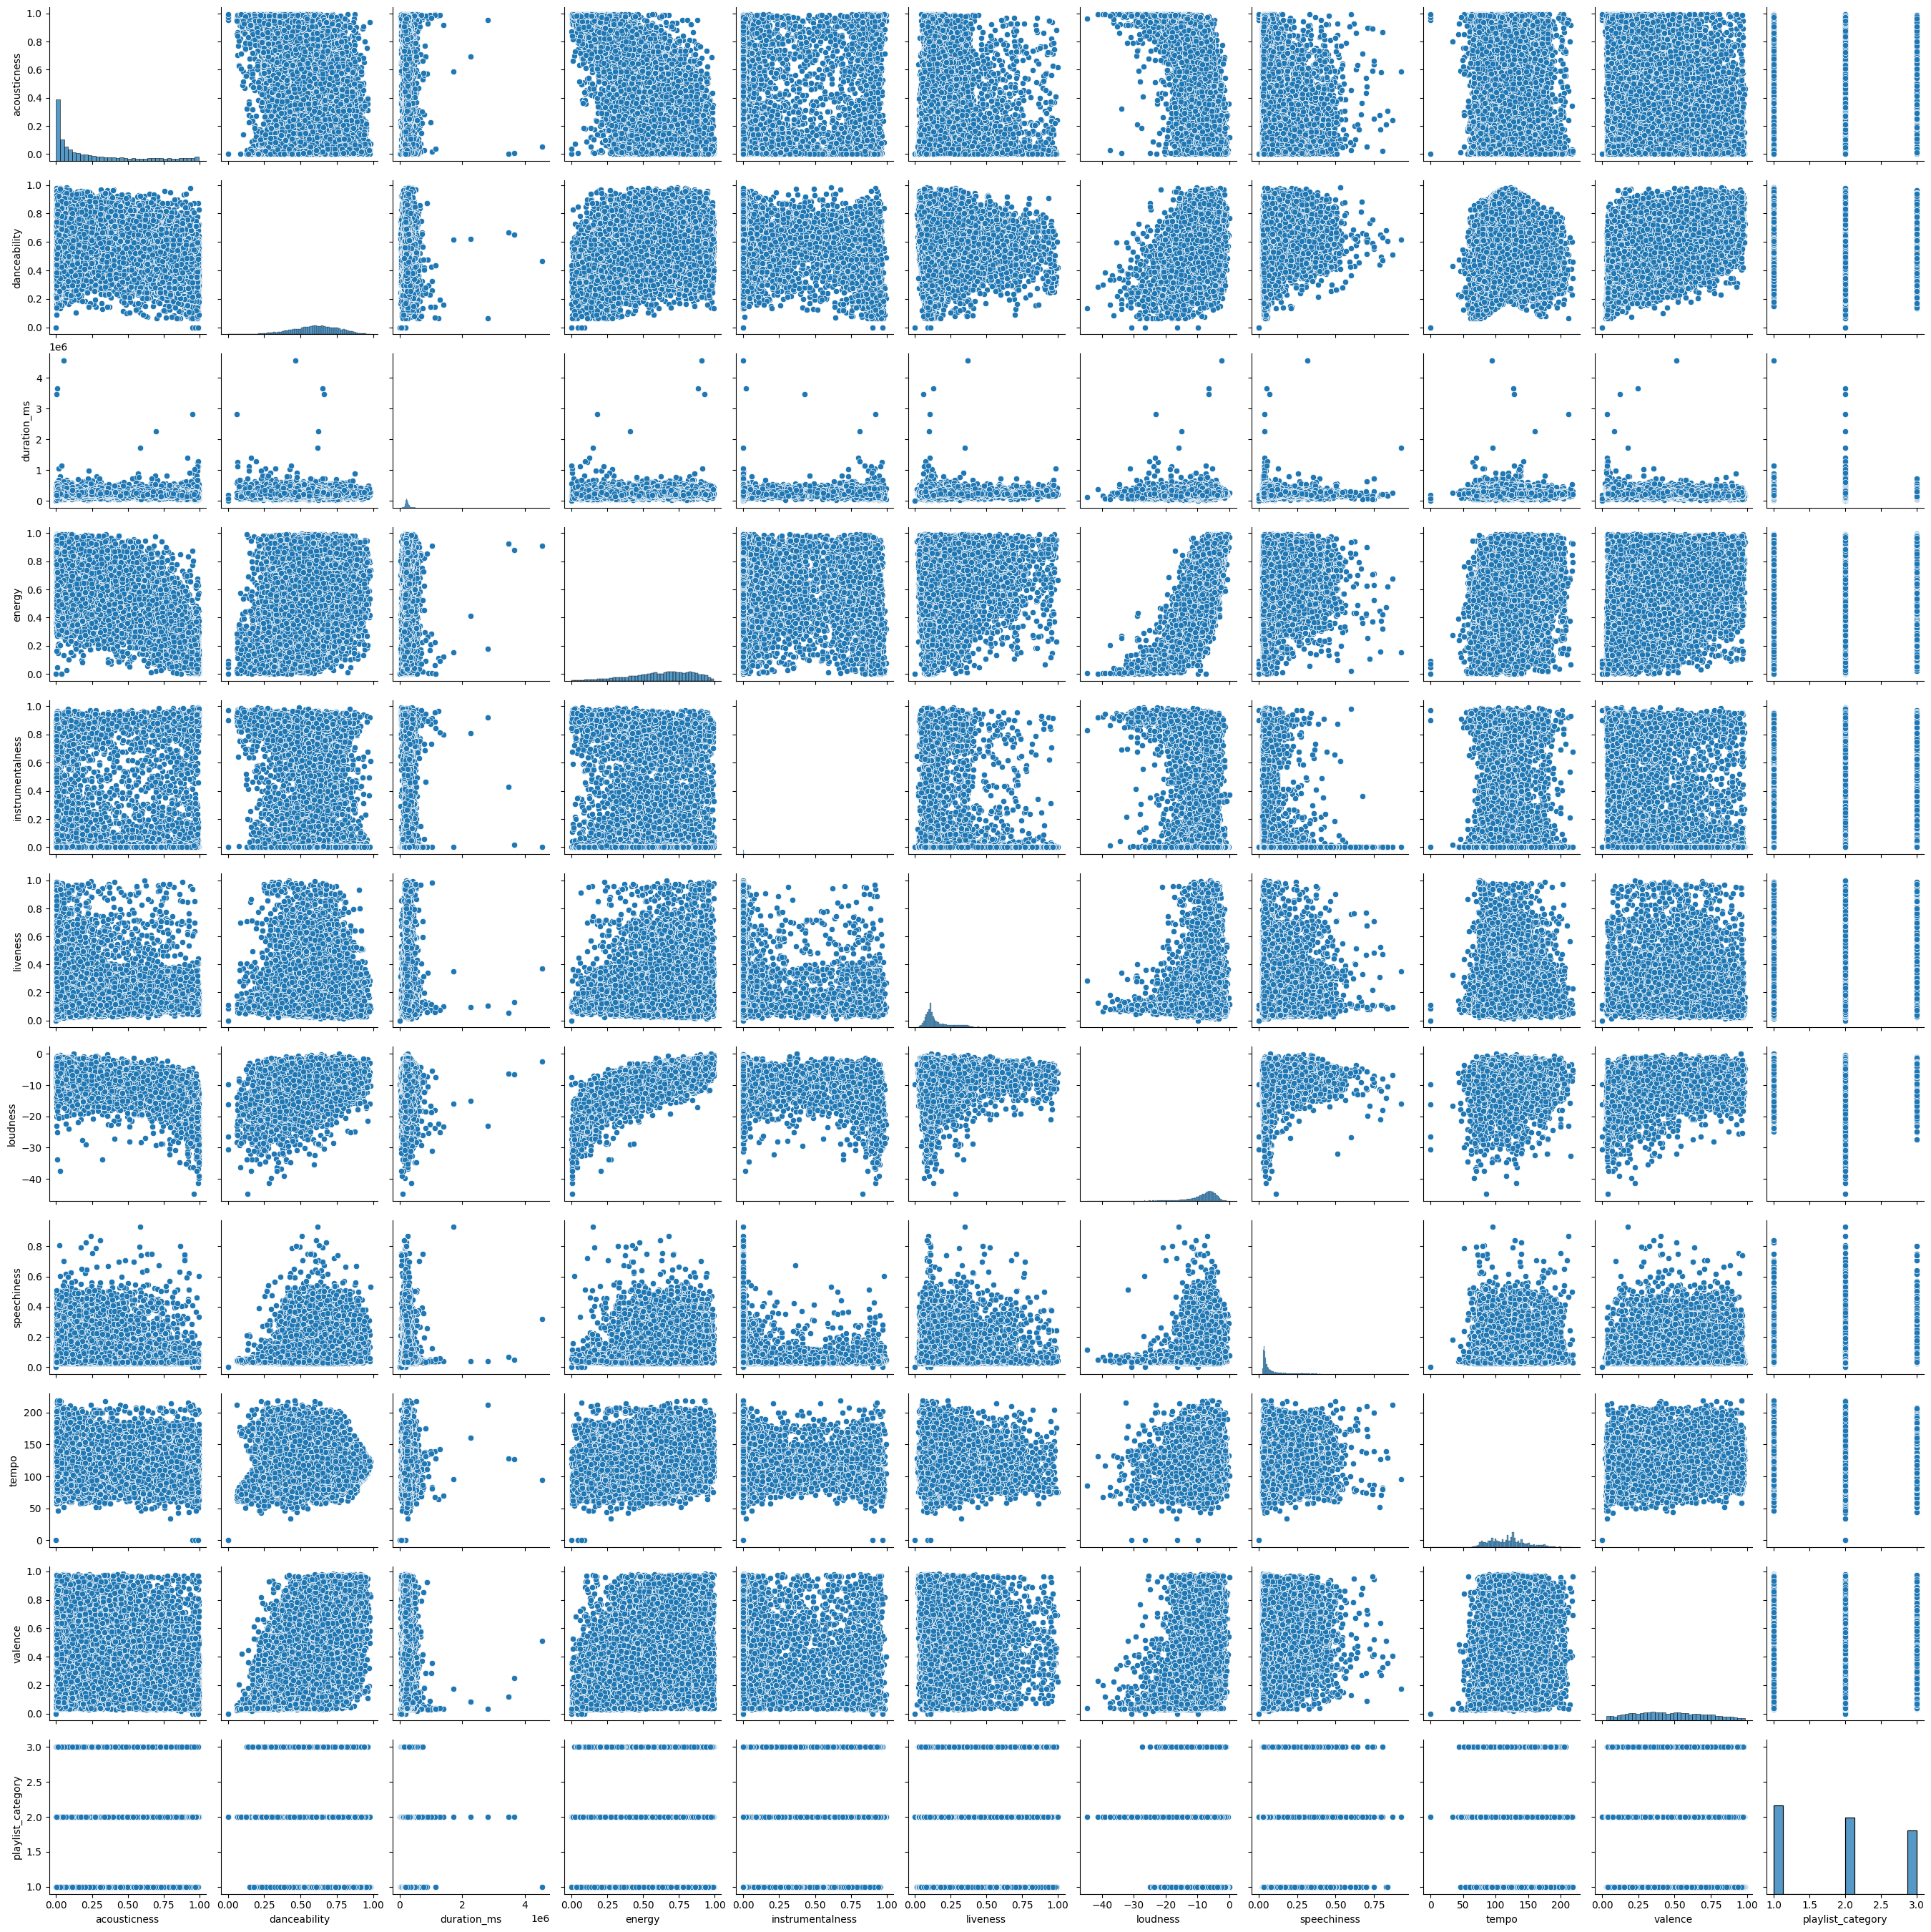

In [13]:
sns.pairplot(data = df)

## Create Models ##

In [5]:
X = df.drop(['name', 'artist', 'id', 'playlist_name', 'playlist_category'], axis=1).values
y = df['playlist_category'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train.shape, X_valid.shape, X_test.shape

((19752, 10), (2469, 10), (2470, 10))

In [10]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [12]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train_scaled, X_valid_scaled, y_train, y_valid)
models

100%|██████████| 29/29 [03:12<00:00,  6.64s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.80               0.79    None      0.80   
RandomForestClassifier             0.79               0.78    None      0.79   
BaggingClassifier                  0.76               0.76    None      0.76   
DecisionTreeClassifier             0.74               0.73    None      0.73   
ExtraTreeClassifier                0.73               0.73    None      0.73   
LabelPropagation                   0.73               0.72    None      0.72   
LabelSpreading                     0.73               0.72    None      0.72   
LGBMClassifier                     0.64               0.63    None      0.63   
NuSVC                              0.61               0.59    None      0.60   
KNeighborsClassifier               0.58               0.56    None      0.57   
SVC                                0.56               0.53    None      0.54   
AdaBoostClassifier                 0.53               0.51    None      0.52   
NearestCentroid                    0.52               0.50    None      0.51   
LogisticRegression                 0.53               0.50    None      0.49   
CalibratedClassifierCV             0.52               0.49    None      0.49   
GaussianNB                         0.51               0.49    None      0.49   
LinearDiscriminantAnalysis         0.52               0.49    None      0.48   
LinearSVC                          0.52               0.48    None      0.47   
RidgeClassifier                    0.52               0.48    None      0.47   
RidgeClassifierCV                  0.52               0.48    None      0.47   
QuadraticDiscriminantAnalysis      0.49               0.48    None      0.48   
SGDClassifier                      0.51               0.48    None      0.44   
PassiveAggressiveClassifier        0.48               0.47    None      0.48   
BernoulliNB                        0.50               0.47    None      0.46   
Perceptron                         0.46               0.45    None      0.46   
DummyClassifier                    0.38               0.33    None      0.21   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 2.04  
RandomForestClassifier               6.24  
BaggingClassifier                    1.69  
DecisionTreeClassifier               0.32  
ExtraTreeClassifier                  0.04  
LabelPropagation                    14.17  
LabelSpreading                      25.02  
LGBMClassifier                       0.80  
NuSVC                               87.99  
KNeighborsClassifier                 0.40  
SVC                                 26.03  
AdaBoostClassifier                   1.24  
NearestCentroid                      0.05  
LogisticRegression                   0.14  
CalibratedClassifierCV              20.31  
GaussianNB                           0.03  
LinearDiscriminantAnalysis           0.13  
LinearSVC                            4.89  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.07  
QuadraticDiscriminantAnalysis        0.09  
SGDClassifier                        0.30  
PassiveAggressiveClassifier          0.08  
BernoulliNB                          0.05  
Perceptron                           0.11  
DummyClassifier                      0.02

### Test with RandomForest ###

In [ ]:
from sklearn.ensemble import RandomForestClassifier

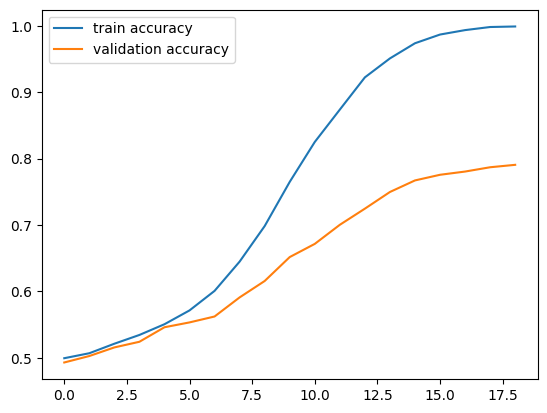

In [ ]:
train_acc = []
valid_acc = []
for i in range(1, 20):
  rf = RandomForestClassifier(max_depth = i)
  rf.fit(X_train_scaled, y_train)
  train_acc.append(rf.score(X_train_scaled, y_train))
  valid_acc.append(rf.score(X_valid_scaled, y_valid))

plt.plot(train_acc, label='train accuracy')
plt.plot(valid_acc, label='validation accuracy')
plt.legend()
plt.show()

Final RF Model

In [ ]:
rf = RandomForestClassifier(max_depth = 15, random_state=42)
rf.fit(X_train_scaled, y_train)
rf.score(X_valid_scaled, y_valid)

0.7594167679222357

In [ ]:
rf.feature_importances_

array([0.11375052, 0.11090027, 0.08568974, 0.12847523, 0.08429507,
       0.08028173, 0.10097937, 0.10102359, 0.09278299, 0.10182149])

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('model', RandomForestClassifier(max_depth = 15, random_state=42))])

In [ ]:
pipe.fit(X_train, y_train)
pipe.score(X_valid, y_valid)

0.7594167679222357

Export Model

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe, open('pipe_rf.pkl', 'wb'))

In [ ]:
model = pickle.load(open('pipe_rf.pkl','rb'))

In [ ]:
model.score(X_test, y_test)

0.78582995951417

### Using an Artificial Neural Network ###

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset

Create custom Dataset to allow for batch processing

In [ ]:
class Tracks(Dataset):
  """
  Arguments:
    data: data as numpy array with last column as labels
    transforms: transformations
  """
  def __init__(self, data, standardise=False):
    self.features = torch.from_numpy(data[:, :-1].astype(np.float32))
    self.labels = torch.from_numpy(data[:, -1].astype(np.int64))
    self.transforms = transforms
  
  def __len__(self):
    return len(self.labels)
  
  def __getitem__(self, idx):
    feature = self.features[idx]
    label = self.labels[idx]

    return feature, label

In [ ]:
train_dataset = Tracks(np.hstack((X_train, y_train.to_frame())))
valid_dataset = Tracks(np.hstack((X_valid, y_valid.to_frame())))
test_dataset = Tracks(np.hstack((X_test, y_test.to_frame())))

In [ ]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

Build Neural Network

In [ ]:
D = X_train.shape[1]
D

10

In [ ]:
model = nn.Sequential(
    nn.Linear(D, 32),
    nn.ReLU(),
    nn.BatchNorm1d(32),
    nn.Linear(32, 4)
)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
opt = torch.optim.Adam(lr=0.001, params=model.parameters())

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=10, out_features=32, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=32, out_features=4, bias=True)
)

Train and Evaluate Neural Network

Iteration: 1 // Train Loss: 1.16 // Valid Loss: 1.01
Iteration: 2 // Train Loss: 0.98 // Valid Loss: 0.97
Iteration: 3 // Train Loss: 0.96 // Valid Loss: 0.97
Iteration: 4 // Train Loss: 0.96 // Valid Loss: 0.97
Iteration: 5 // Train Loss: 0.95 // Valid Loss: 0.96
Iteration: 6 // Train Loss: 0.95 // Valid Loss: 0.96
Iteration: 7 // Train Loss: 0.95 // Valid Loss: 0.96
Iteration: 8 // Train Loss: 0.95 // Valid Loss: 0.96
Iteration: 9 // Train Loss: 0.95 // Valid Loss: 0.96
Iteration: 10 // Train Loss: 0.95 // Valid Loss: 0.96
Iteration: 11 // Train Loss: 0.94 // Valid Loss: 0.96
Iteration: 12 // Train Loss: 0.94 // Valid Loss: 0.96
Iteration: 13 // Train Loss: 0.94 // Valid Loss: 0.95
Iteration: 14 // Train Loss: 0.94 // Valid Loss: 0.95
Iteration: 15 // Train Loss: 0.94 // Valid Loss: 0.95
Iteration: 16 // Train Loss: 0.94 // Valid Loss: 0.96
Iteration: 17 // Train Loss: 0.94 // Valid Loss: 0.95
Iteration: 18 // Train Loss: 0.94 // Valid Loss: 0.95
Iteration: 19 // Train Loss: 0.94 // 

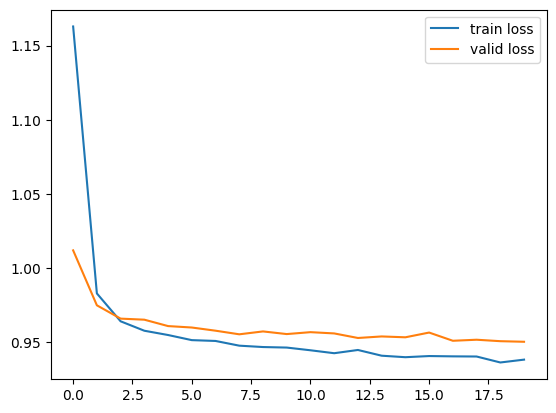

In [ ]:
n_epochs = 20
train_losses = np.zeros(n_epochs)
valid_losses = np.zeros(n_epochs)

for n in range(n_epochs):

  # train
  train_loss = []
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    model.zero_grad()
    pY_train = model(inputs)
    loss = criterion(pY_train, targets)

    loss.backward()
    opt.step()

    train_loss.append(loss.item())
  train_losses[n] = np.mean(train_loss)

  # train
  valid_loss = []
  for inputs, targets in valid_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    pY_valid = model(inputs)
    loss = criterion(pY_valid, targets)

    valid_loss.append(loss.item())
  valid_losses[n] = np.mean(valid_loss)

  # print
  print(f'Iteration: {n+1} // Train Loss: {train_losses[n]:.2f} // Valid Loss: {valid_losses[n]:.2f}')

plt.plot(train_losses, label='train loss')
plt.plot(valid_losses, label='valid loss')
plt.legend()
plt.show()

In [ ]:
# train
n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  _, pY = torch.max(model(inputs), 1)
  
  n_correct += (targets == pY).sum()
  n_total += len(targets)

train_acc = n_correct / n_total

# train
n_correct = 0
n_total = 0
for inputs, targets in valid_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  _, pY = torch.max(model(inputs), 1)
  
  n_correct += (targets == pY).sum()
  n_total += len(targets)

valid_acc = n_correct / n_total

print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", valid_acc)

Train Accuracy:  tensor(0.5529, device='cuda:0')
Validation Accuracy:  tensor(0.5468, device='cuda:0')


RF outperforms ANN